![title](../img/cover.png)

# Mision
1. Calcular la derivada de una función utilizando el operador derivada hacia adelante, hacia atrás y mediante la derivada de dos puntos. 
2. Resolver la ecuación de onda mediante una suma de funciones harmónicas.

# Parte 1
En esta primera parte vamos a calcular la derivada de una función de forma numérica utilizando las técnicas vistas en clase. Para ello vamos a utilzar funciones conocidas y vamos a comparar la derivada numérica con la solución analítica. Recordemos las definiciones vistas en clase.<br>
## Derivada hacia adelante
$$
\begin{equation}
\frac{df(t)}{dt}=\frac{f(t+dt)-f(t)}{dt}
\end{equation}
$$
## Derivada hacia atrás
$$
\begin{equation}
\frac{df(x)}{dx}=\frac{f(x)-f(x-dx)}{dx}
\end{equation}
$$
## Derivada de dos puntos
$$
\begin{equation}
\frac{df(x)}{dx}=\frac{f(x+dx)-f(x-dx)}{2dx}
\end{equation}
$$
## Segunda derivada
$$
\begin{equation}
\frac{df^2(t)}{dt^2}=\frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}
\end{equation}
$$
# Pasos
1. Declare la función **$f(x)=sin(2\pi x/\lambda)$**, donde **$\lambda$** es la longitud de onda. En este caso vamos a suponer que la longitud onda es de **10 metros** y que el dominio espacial en el que vamos a resolver las derivadas es en el intervalo de **0 a 80 metros**. 
2. Defina 3 funciones para el calculo de la **derivada hacia adelante, hacia atrás y de dos puntos**. 

**NOTA**. Cuando se calculan las derivadas hacia adelante y hacia atras el vector resultante tendrá una dimensión de $N-1$, es decir, un punto menos que $f(x)$. En el caso de la derivada hacia adelante se pierde el último elemento mientras que en la derivada hacia atrás se pierde el primer elemento. En el caso de la derivada de dos puntos y la derivada hacia adelante y hacia atrás se pierden los puntos de los extremos. Asegurate de considerar esto cuando grafíques tus funciones. 

**Tip.** En Python el primer elemento de un arreglo corresponde a la posición [0], y el último a la posición [-1]. El penúltimo elemento corresponde a la posición [-2] y así sucesivamente. 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
%matplotlib notebook

In [48]:
# Escribe tu código aqui ~3 líneas
l      = None  # Longitud de onda
sample = None  # Numero de segmentos por longitud de onda
Xmax   = None  # Longitud Máxima
N      = (Xmax/l)*sample + 1
dx     = l/sample
x      = np.linspace(0,Xmax, int(N))
f      = np.sin(2*np.pi*x/l)


In [49]:
def derivada_hacia_adelante(f, dx):
    # Escribe tu código aqui ~1 línea
    df_forward = None
    return df_forward
def derivada_hacia_atras(f, dx):
    # Escribe tu código aqui ~1 línea
    df_backward = None
    return df_backward 
def derivada_2_puntos(f, dx):
    # Escribe tu código aqui ~1 línea
    df_2points = None
    return df_2points
def segunda_derivada(f,dx):
    # Escribe tu código aqui ~1 línea
    d2f_dx2 = None
    return d2f_dx2

<IPython.core.display.Javascript object>


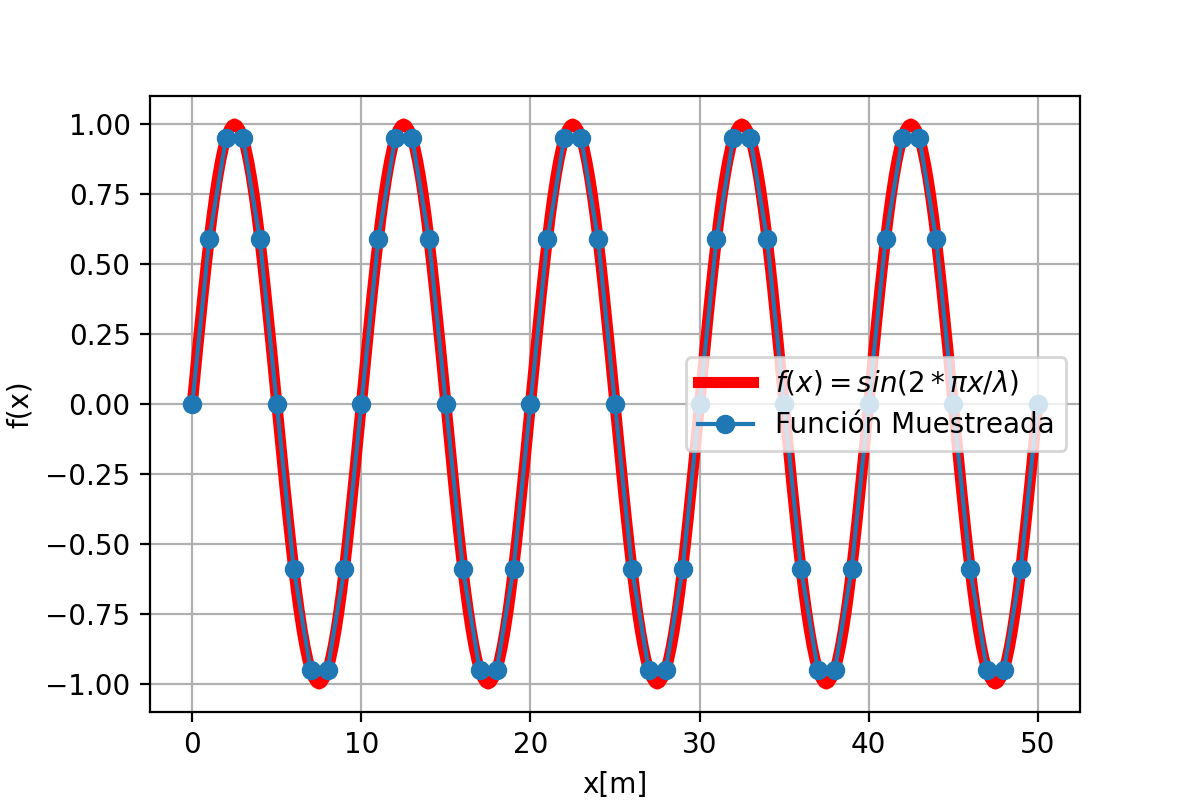

<IPython.core.display.Javascript object>


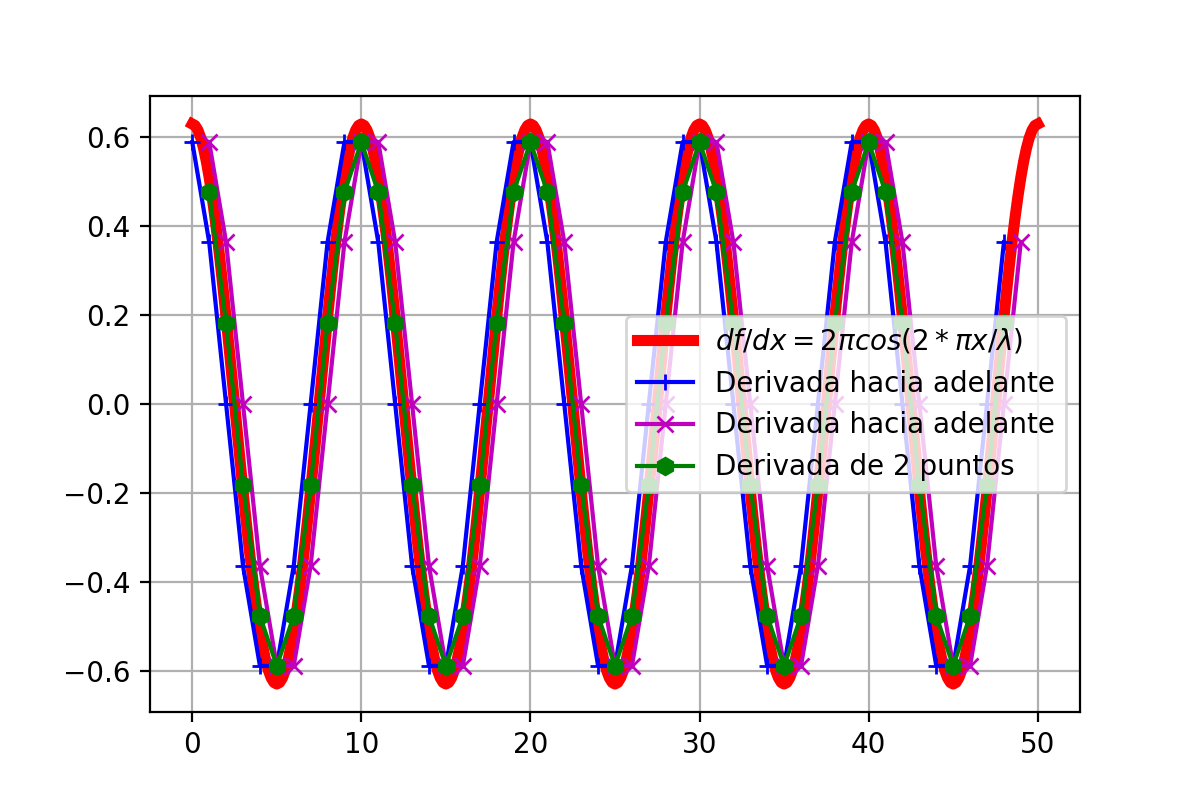

<IPython.core.display.Javascript object>


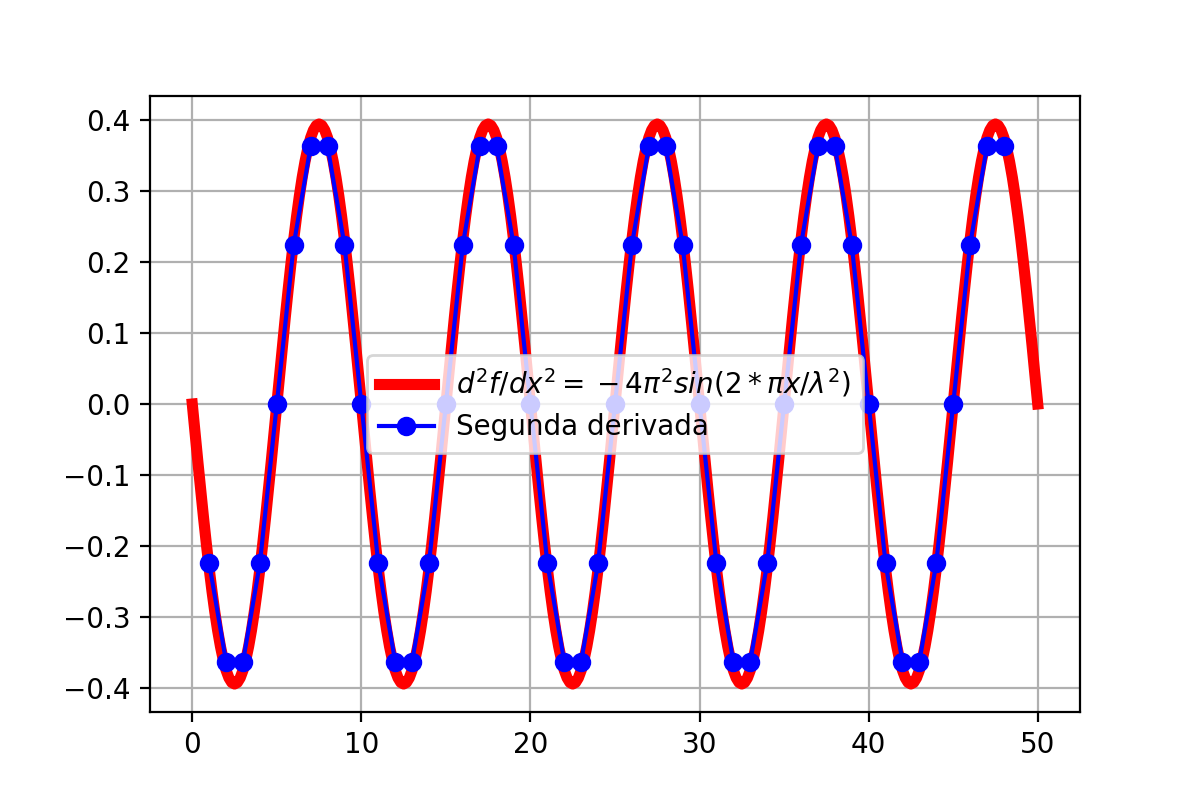

In [50]:
# Función sobre muestreada para representar función analítica
x_anl  = np.linspace(0,Xmax,301)
f_anl  = np.sin(2*np.pi*np.linspace(0,Xmax,301)/l)

# Escribe tu código aqui ~4 líneas
x_for  = None
x_back = None
x_2p   = None
x_2der = None

d_anl   = 2*np.pi*np.cos(2*np.pi*x_anl/l)/l
dd_anl  = -4*np.pi**2*np.sin(2*np.pi*x_anl/l)/l**2
df_for  = derivada_hacia_adelante(f, dx)
df_back = derivada_hacia_atras(f,dx)
df_2p   = derivada_2_puntos(f, dx)
ddf     = segunda_derivada(f, dx)


# Plotting 
plt.figure(figsize=(6,4))
plt.plot(x_anl,f_anl,'r',label=f'$f(x)=sin(2*\pi x/\lambda)$',lw=4)
plt.plot(x,f,'o-', label='Función Muestreada', )
plt.legend()
plt.xlabel('x[m]')
plt.ylabel('f(x)')
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(x_anl,d_anl,'r',label=f'$df/dx= 2\pi cos(2*\pi x/\lambda)$',lw=4)
plt.plot(x_for,df_for,'+-b',   label='Derivada hacia adelante')
plt.plot(x_back,df_back,'x-m', label='Derivada hacia adelante')
plt.plot(x_2p, df_2p,'h-g',    label='Derivada de 2 puntos')
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot(x_anl,dd_anl,'r',label=f'$d^2f/dx^2= -4\pi^2 sin(2*\pi x/\lambda^2)$',lw=4)
plt.plot(x_2der, ddf,'o-b',   label='Segunda derivada' )
plt.grid()
plt.legend()
plt.show()


# Segunda parte
En esta sección vamos a resolver la ecuación de onda en 1D utilizando la suma de modos normales a una cuerda. Los detalles del procedimiento aparecen en las *paginas 36-37*, del libro *Wyssesion, S. Introduction to Seismology*. La solución a la ecuación de onda, <br><br>
$$
\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2 u(x,t)}{\partial t^2},
$$<br>
se puede escribir como una suma ponderada de sus modos normales de la forma,<br><br>
$$
u(x,t)=\sum^\infty_{n=0}sin(n\pi x_s/L)F(\omega_n)sin(n\pi x/L)cos(\omega_nt).
$$<br>
Donde, $L$ es la longitud de la cuerda, $x_s$ es la localización de la fuente, $\omega_n$ es la frecuencia de resonancia del modo $n$. La función $F(\omega_n)$ es un factor de peso que describe como diferentes frecuencias contribuyen a la historia temporal de la fuent, esta función se puede escribir como,<br><br>
$$
F(\omega_n) = exp(-(\omega_n \tau)^2/4)
$$<br>
$\tau$ es la duración del pulso de la fuente. 
# Pasos
1. Inicializa tus parametros: Numero de modos a sumar (40), velcidad del medio (3km/s), posición de la fuente $x_s=8\,m$, discretización del medio ($dx=0.05m$), intervlo de tiempo ($dt=0.05\, s$), tiempo ($t=1.5\,s$) y duración del pulso ($\tau=0.2$).
2. Defina las funciones $A_n$, $F(\omega_n)$ y $u(x,t)$



<IPython.core.display.Javascript object>


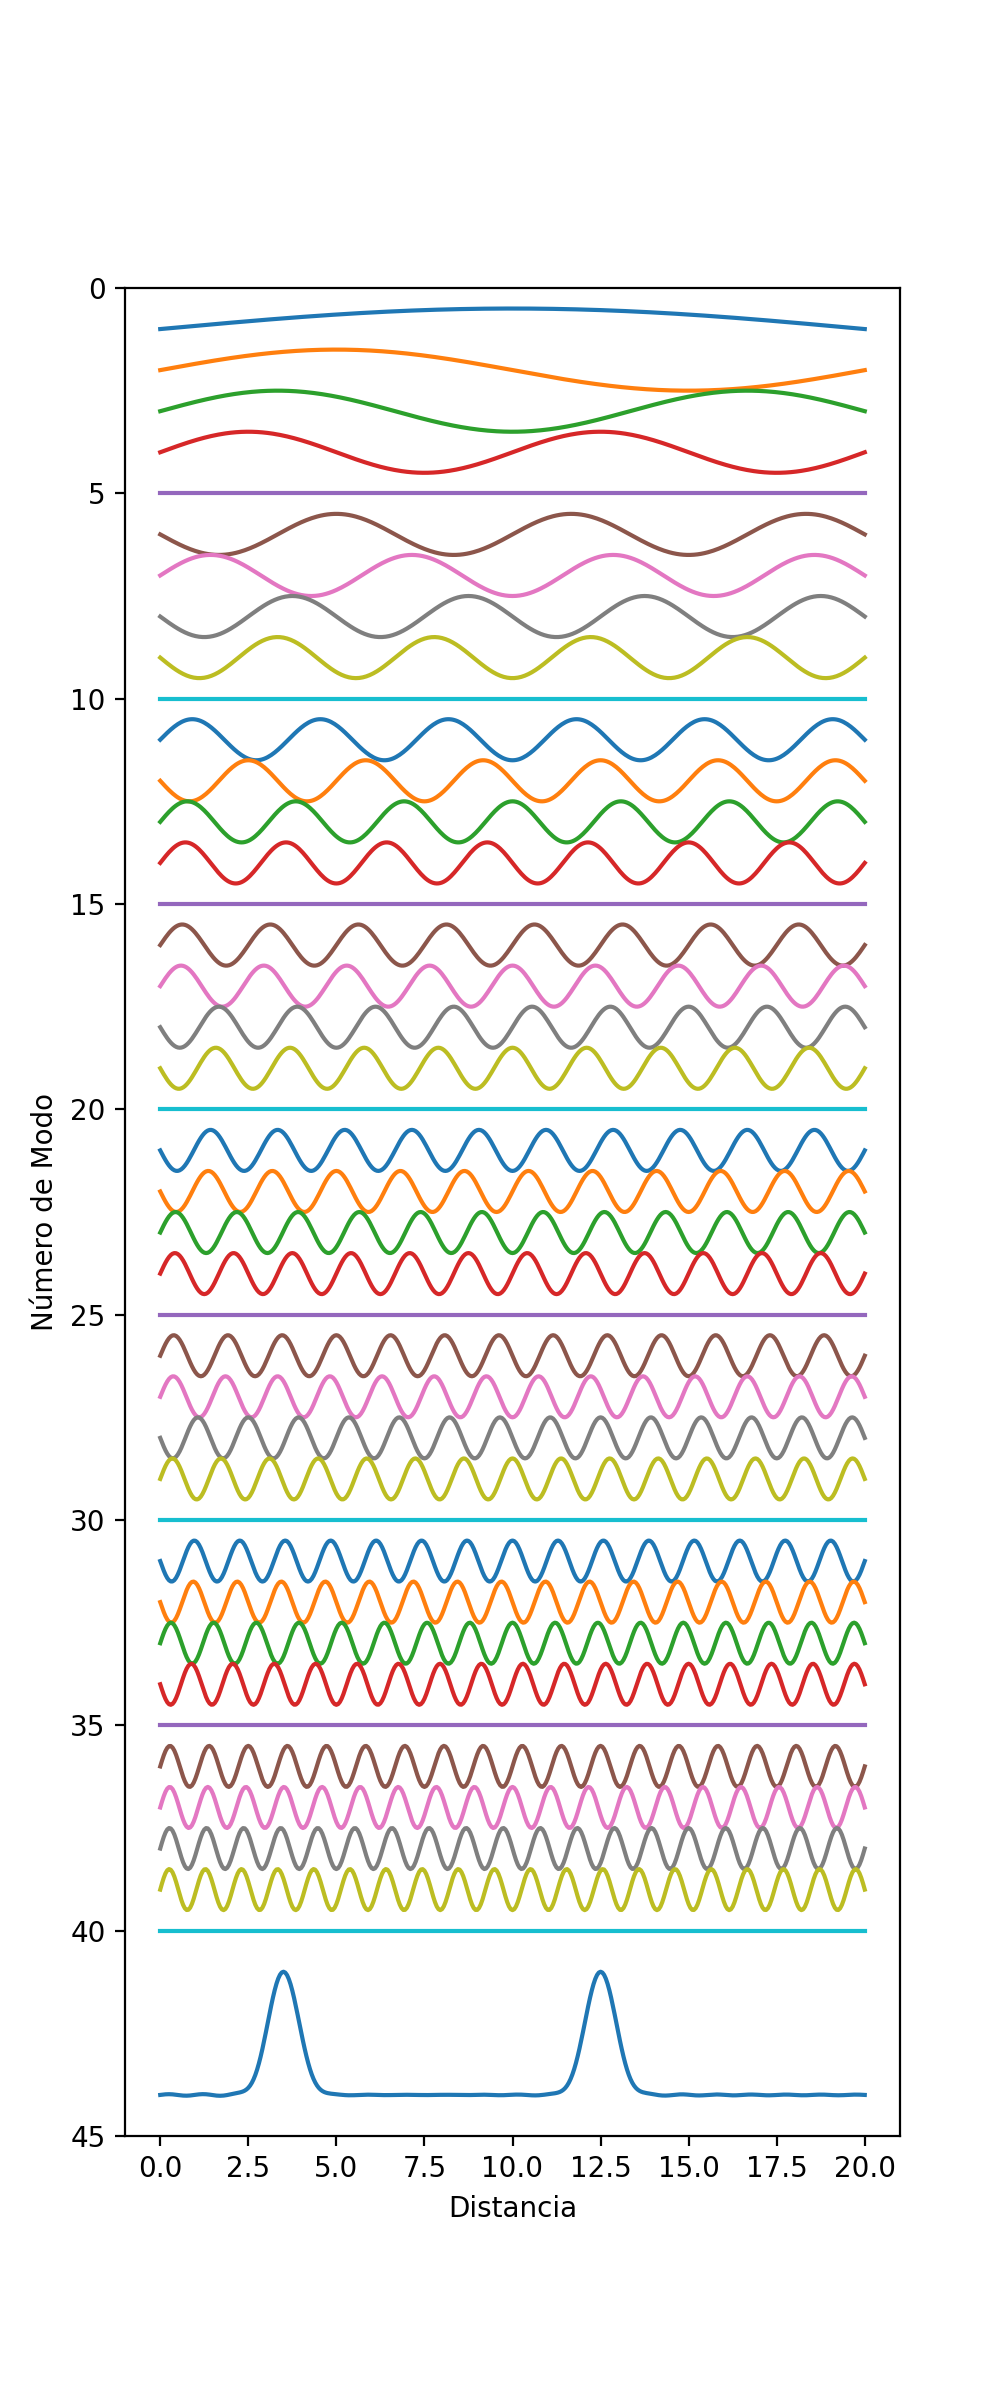

In [51]:
# Escribe tu código aqui ~8 líneas
N   = None # Número de modos normales a sumar
v   = None # Velocidad en metros por segundo
xs  = None # Localización de la fuente
L   = None # Longitud de la cuerda
dx  = None # Incremento en x/
dt  = None # Incremento en tiempo
t   = None # Tiempo al que se va a calcular la onda
tau = None # Duración del curso

Xmax = L
x   = np.arange(0, Xmax + dx, dt)

def An(n):
# Escribe tu código aqui ~1 línea
    A = None
    return A

def F(wn):
# Escribe tu código aqui ~1 línea
    F = None
    return F
def u(t,n):
    un  = np.zeros(x.shape)
# Escribe tu código aqui ~2 líneas
    wn  = None
    un  = None
    return un

plt.figure(figsize=(5,12))

ut = np.zeros(x.shape)
for n in range(1,N+1):
    un   = u(t,n)
    ut   = ut + un
    umax = np.max(np.abs(un))
    if umax <= 1e-5:
        un = np.zeros(x.shape)
    else:
        un   = un/umax/2; # Normalizar gráfica
    plt.plot(x,-un+n)

ut = ut/np.max(np.abs(ut))/2;
plt.plot(x,-6*ut + N + 4)
plt.xlabel('Distancia')
plt.ylabel('Número de Modo')
plt.ylim([N+5, 0])
plt.show()


# Propagación en tiempo
Por último ejecuta la siguiente celda para ver una simulación de la onda en 1D. 

<IPython.core.display.Javascript object>


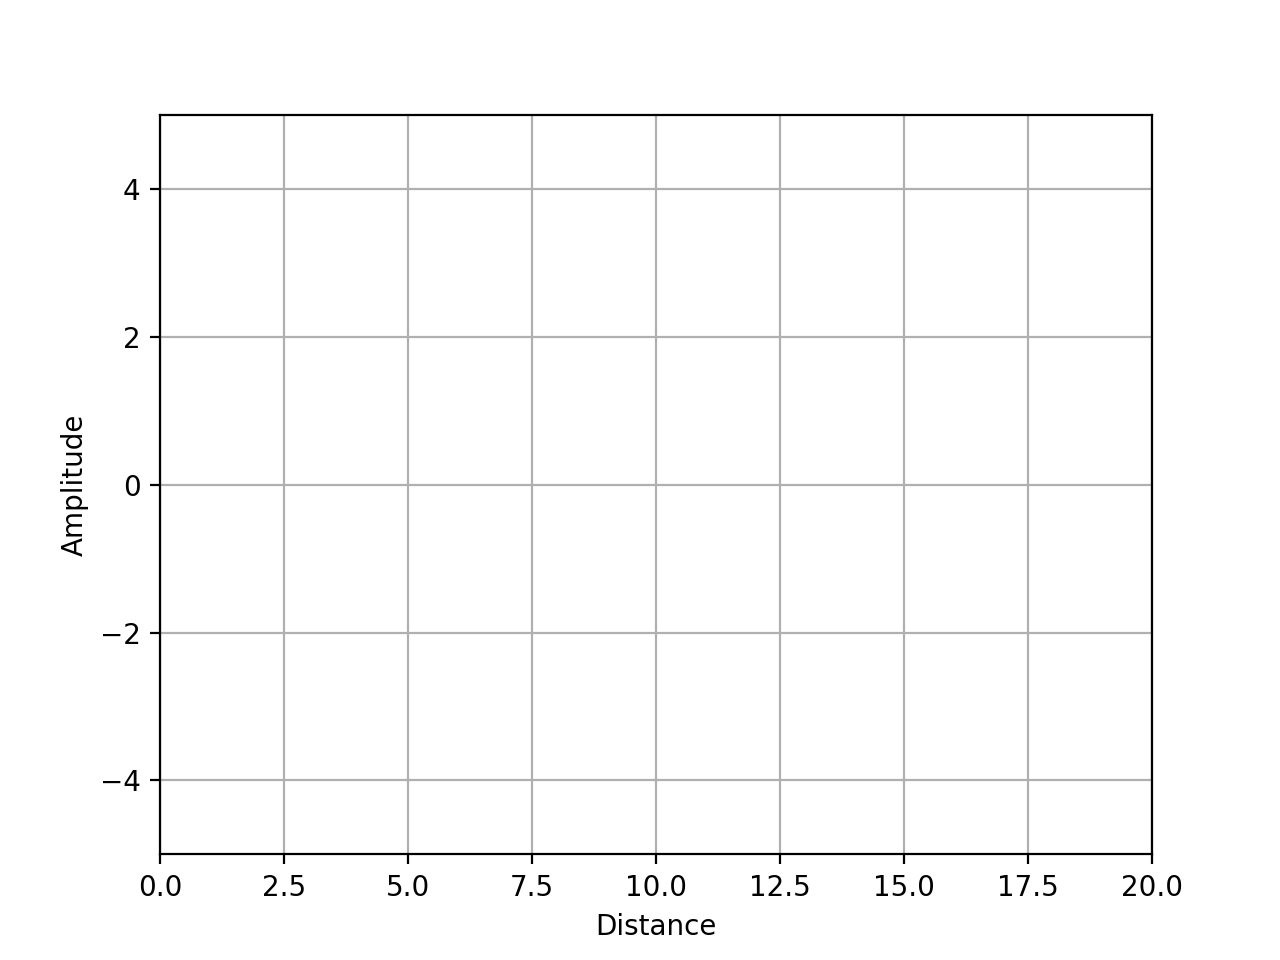

True

In [63]:
fig = plt.figure()
ax = plt.axes(xlim=(0, Xmax), ylim=(-5, 5))
ax.grid()
plt.xlabel('Distance')
plt.ylabel('Amplitude')
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def onda(ti):
    t = ti*dt
    ut = np.zeros(x.shape)
    for n in range(1,N+1):
        un   = u(t,n)
        ut   = ut + u(t,n)
        line.set_data(x, ut)
    return line,

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, onda, init_func=init, 
                               frames=300, interval=5, blit=True)
HTML(anim.to_html5_video())
anim._repr_html_() is None



Este es el resultado al que tienen que llegar. **<font color='red'>Favor de borrar está celda junto con la imagen antes de enviar su tarea para reducir el tamaño de su archivo.</font>**
![title](./onda.gif)
